### **BANK-FULL**

> **Relevant Information:**

> The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

### **FEATURE DESCRIPTION**

>  **bank client data:**
> 1. age (numeric)
> 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
     "blue-collar","self-employed","retired","technician","services") 
> 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
> 4. education (categorical: "unknown","secondary","primary","tertiary")
> 5. default: has credit in default? (binary: "yes","no")
> 6. balance: average yearly balance, in euros (numeric) 
> 7. housing: has housing loan? (binary: "yes","no")
> 8. loan: has personal loan? (binary: "yes","no")

>  **related with the last contact of the current campaign:**

> 9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
> 10. day: last contact day of the month (numeric)
> 11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
> 12. duration: last contact duration, in seconds (numeric)

> **other attributes**

> 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
> 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
> 15. previous: number of contacts performed before this campaign and for this client (numeric)
> 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

> **Output variable (desired target):**

> 17. y - has the client subscribed a term deposit? (binary: "yes","no")

### **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import warnings 
warnings.filterwarnings("ignore")

### **OVERVIEW**

In [2]:
# load dataset
df = pd.read_csv("Bank-full.csv", sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# check the first 5 rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# check the last 5 rows of data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# check the number of rows and columns in df
df.shape

(45211, 17)

> In the available data there are 45211 rows and 17 columns

In [6]:
# View info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Checking number of null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> In the available data, it is known that there are no NULL values for each feature

In [8]:
# # Looking the distribution of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
# Looking the distribution of categorical data
df.describe(include = "object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### **DATA PREPROCESSING**

In [10]:
# Mark the "subscribed" with "1" and "not subscribed" with "0"
df['y'] = df['y'].map( 
                   {'yes':1 ,'no':0}) 

In [11]:
# Looking column of numeric and categorical data
df_con = df.select_dtypes(["int64"])
df_cat = df.select_dtypes(["object"])

In [12]:
df_con.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [13]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


### **EXPLORATION DATA ANALYSIS**

### Numerical Variables

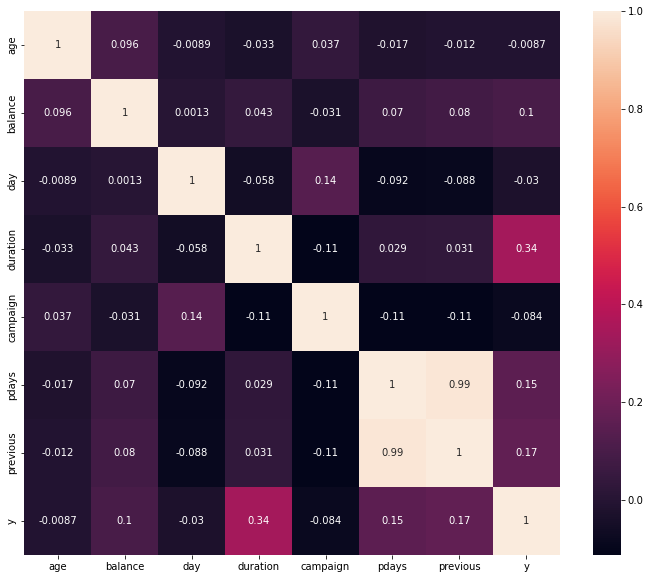

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr("spearman"), annot = True)
plt.show()

> Seen in the heatmap which shows the correlation value between variables, that:

> 1. If you look at the correlation relationship based on y with other features, the correlation value is very weak and most of the correlation values between y and other features have a negative relationship.
> 2. One of the two variables that have a very strong relationship is pdays and previous where the correlation value is 0.99.

In [15]:
data_numeric = df.select_dtypes(include='int64')
col_num = data_numeric.columns

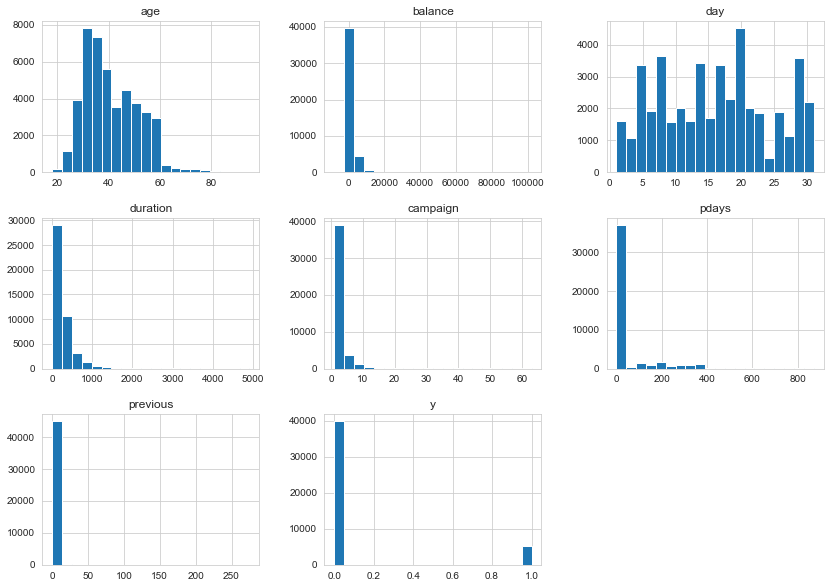

In [16]:
sns.set_style('whitegrid')
df.hist(bins=20, figsize=(14,10))
plt.show()

> From the graph above, the following information is obtained:

> 1. The highest number of clients is in the age range of 30-50 years.
> 2. The client's average annual balance value is at most under 20,000 Euros.
> 3. The highest number of contacts with clients occurs on the 15-20th of each month.
> 4. The most duration occurs when the duration is below 1000 seconds.
> 5. The number of contacts made during this campaign is 1-10 times for 1 client.
> 6. There are still many clients who have not been contacted


### Categorical Variables

#### Distribution of clients who have subscribed to term deposits

0    39922
1     5289
Name: y, dtype: int64


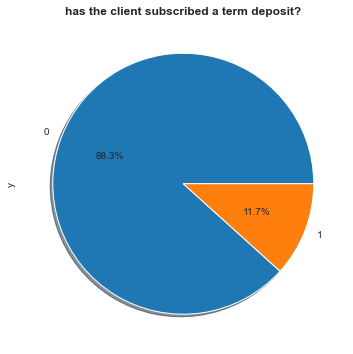

In [17]:
plt.figure(figsize = (8, 6))
plt.title("has the client subscribed a term deposit?", size = 12, fontweight = 'bold')
df["y"].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)
print(df['y'].value_counts())
plt.show()

> Based on the pie chart above, it can be seen that the number of clients who have subscribed to time deposits is 5289 with a percentage of 88.3% and the number of clients who have not subscribed to time deposits is 39922 with a percentage of 11.7%.

#### Is marital status a major factor in subscribing to term deposits?

In [41]:
# distribution of marital feature
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [18]:
# crosstab between marital and y
pd.crosstab(df.marital,df.y)

y,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


Marital:
 Divorce = 11%
 Married = 10%
 Single  = 14%


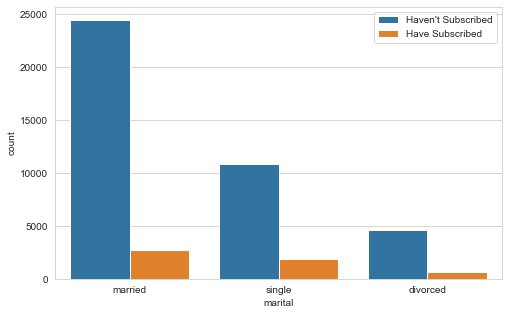

In [20]:
d1 = int(622/5207*100)
s1 = int(1912/12790*100)
m1 = int(2755/27214*100)

plt.figure(figsize=(8,5))
sns.countplot(x="marital", hue= "y", data = df)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
print(f"Marital:\n Divorce = {d1}%\n Married = {m1}%\n Single  = {s1}%")
plt.show()

> Based on the graph above, it can be seen that:

> 1. The number of clients is dominated by married clients with a total of 27214 clients.
> 2. It can be seen that the highest number of clients who make time deposits are married clients, which are 2755. The few clients who make time deposits are clients who are divorced, which are 622. However, based on the percentage results, single clients have a percentage largest for making time deposits, with a percentage of 14%.

#### Is education a major factor in subscribing to term deposits??

In [43]:
# Distribution of education feature
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [42]:
# crosstab between education and y
pd.crosstab(df.education,df.y)

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


Education:
 Secondary = 10%
 Tertiary  = 15%
 Primary   = 8%
 Unknown   = 13%


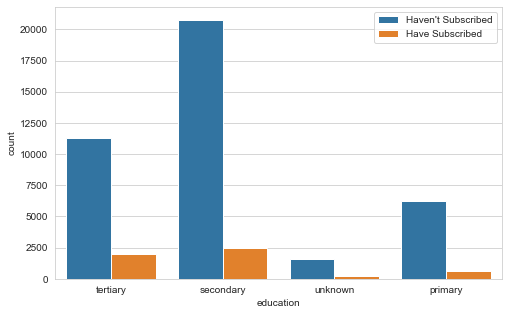

In [23]:
sec = int(2450/23202*100)
pri = int(591/6851*100)
ter = int(1996/13301*100)
unk = int(252/1857*100)

plt.figure(figsize=(8,5))
sns.countplot(x="education", hue= "y", data = df)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
print(f"Education:\n Secondary = {sec}%\n Tertiary  = {ter}%\n Primary   = {pri}%\n Unknown   = {unk}%")
plt.show()

> Based on the information above, it can be seen that:

> 1. The number of clients is dominated by clients who have a secondary education level with a total of 23202 clients
> 2. It can be seen that the highest number of clients who make time deposits are clients who are at the secondary level. Meanwhile, clients whose education level is not known are the few who make time deposits. However, if based on percentage results, clients who are at the tertiary level have the largest percentage to make time deposits, with a percentage of 15%. So it can be assumed that the higher the education, the greater the tendency of a person to make a deposit.

#### Is job a major factor in subscribing to deposits?

In [45]:
# distribution of job feature
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [44]:
# crosstab between job and y
pd.crosstab(df.job,df.y)

y,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


Job:
 Blue-collar: 7%
 Management: 13%
 Technician: 11%
 Admin: 12%
 Services: 8%
 Retired: 22%
 Self-employed 11%
 Entrepreneur: 8%
 Unemployed: 15%
 Housemaid: 8%
 Student: 28%
 Unknown: 11%


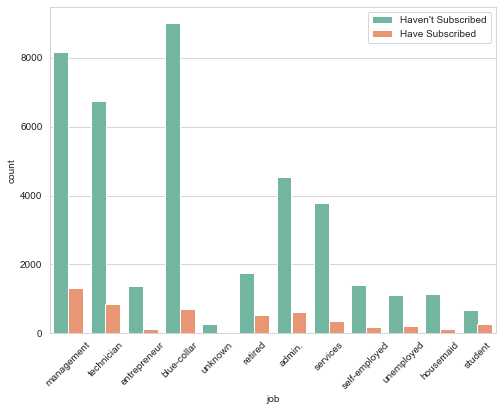

In [26]:
bc   = int(708/9732*100)
man  = int(1301/9458*100)
tech = int(840/7597*100)
adm  = int(631/5171*100)
serv = int(369/4154*100)
ret = int(516/2264*100)
slf = int(187/1579*100)
ent = int(123/1487*100)
unm = int(202/1303*100)
hm  = int(109/1240*100)
std = int(269/938*100)
unk = int(34/288*100)

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="job", hue="y", palette="Set2")
plt.legend(["Haven't Subscribed", "Have Subscribed"])
print(f"Job:\n Blue-collar: {bc}%\n Management: {man}%\n Technician: {tech}%\n Admin: {adm}%\n Services: {serv}%\n Retired: {ret}%\n Self-employed {slf}%\n Entrepreneur: {ent}%\n Unemployed: {unm}%\n Housemaid: {hm}%\n Student: {std}%\n Unknown: {unk}%")
plt.xticks(rotation=45)
plt.show()

> 1. Based on the graph above, it can be seen that the number of clients is dominated by clients who have Blue-collar jobs
> 2. From the graph above, it can be seen that based on the type of work that has the possibility to make a deposit is management with a total of 1301 clients, while the least is a client whose type of work is unknown with a total of 34 clients.
> 3. Based on the percentage, clients who are still students have the highest percentage of 28% with a total of 269 clients who subscribe.

#### Is Poutcome a major factor towards term deposit subscriptions?

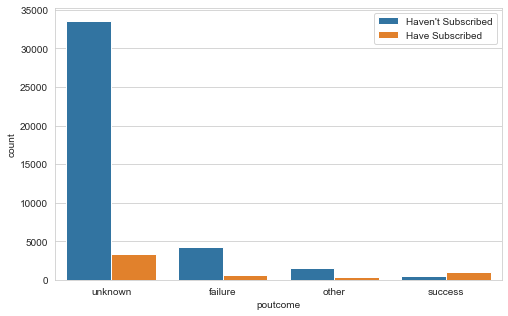

poutcome  y
failure   0     4283
          1      618
other     0     1533
          1      307
success   1      978
          0      533
unknown   0    33573
          1     3386
Name: y, dtype: int64

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x="poutcome", hue= "y", data = df)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.show()
df.groupby("poutcome")["y"].value_counts()

> Based on the graph above, it can be seen that as a result of the previous successful marketing campaign, more clients decided to subscribe to deposits, with 978 subscribing clients and 533 unsubscribing clients. However, it cannot be concluded that when the previous campaign was successful, more and more people subscribed to deposits. Because if you look at the graph, there are still many clients who don't know the results of their previous campaigns.

#### Is contact a major factor in subscribing to deposits?

In [28]:
df.groupby("contact")["y"].value_counts()

contact    y
cellular   0    24916
           1     4369
telephone  0     2516
           1      390
unknown    0    12490
           1      530
Name: y, dtype: int64

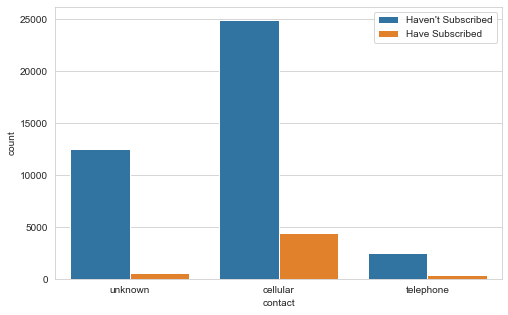

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="contact", hue= "y", data = df)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.show()

> Based on the graph above, it can be seen that the clients who mostly decide to subscribe to deposits are clients who communicate via cellular with a total of 4369 and the percentage is 14%.

#### Are clients having housing loans a major factor in subscribing to deposits?

In [30]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [31]:
pd.crosstab(df.housing,df.y)

y,0,1
housing,,
no,16727,3354
yes,23195,1935


Housing | Yes: 7%, No: 16%


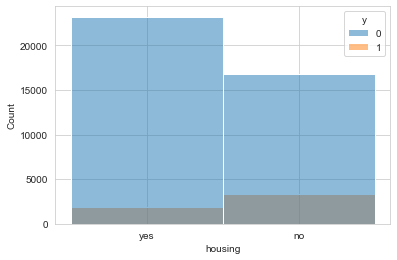

In [32]:
no  = int(3354/20081*100)
yes = int(1935/25130*100)

print(f"Housing | Yes: {yes}%, No: {no}%")
sns.histplot(data=df, x="housing", hue="y")
plt.show()

> From the graph above, it is known that only 1935 clients who have housing loans subscribed with a percentage of 7%. Meanwhile, clients who do not have housing loans have a greater chance of subscribing to deposits, with a total of 3354 clients with a percentage of 16%.

#### Are clients having personal loans a major factor in deposit subscriptions?

In [33]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [34]:
pd.crosstab(df.loan,df.y)

y,0,1
loan,,
no,33162,4805
yes,6760,484


Loan | Yes: 6%, No: 12%


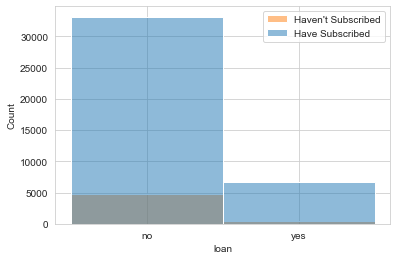

In [35]:
no1  = int(4805/37967*100)
yes1 = int(484/7244*100)

print(f"Loan | Yes: {yes1}%, No: {no1}%")
sns.histplot(data=df, x="loan", hue="y")
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.show()

> Based on the graph above, it can be seen that someone who does not have a personal loan has a higher chance of subscribing to a deposit with a total of 4805 clients with a percentage of 12%, while those who have a personal loan only have 484 clients with a percentage of 6%.

#### Is the last month of contact a major factor towards a term deposit subscription?

In [36]:
df.groupby("month")["y"].value_counts()

month  y
apr    0     2355
       1      577
aug    0     5559
       1      688
dec    0      114
       1      100
feb    0     2208
       1      441
jan    0     1261
       1      142
jul    0     6268
       1      627
jun    0     4795
       1      546
mar    1      248
       0      229
may    0    12841
       1      925
nov    0     3567
       1      403
oct    0      415
       1      323
sep    0      310
       1      269
Name: y, dtype: int64

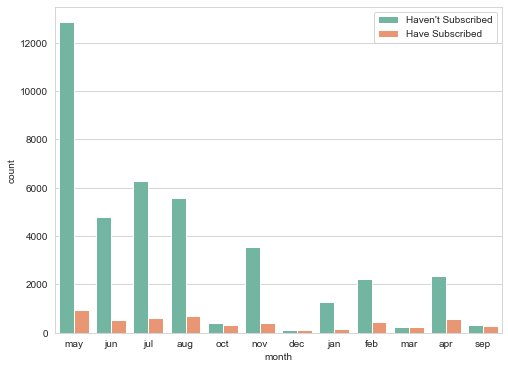

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="month", hue="y", palette="Set2")
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.show()

> Based on the graph above, it can be seen that May is the month with the most subscribers, which is 925 clients. However, October, December, March and September have good results. Because if you look at the graph, the months of October, December, March and September do not have much distance between clients who choose to make deposits and those who don't.

#### Are clients who have credit a major factor in subscribing to deposits?

In [38]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [39]:
pd.crosstab(df.default,df.y)

y,0,1
default,,
no,39159,5237
yes,763,52


Default | Yes: 6%, No: 11%


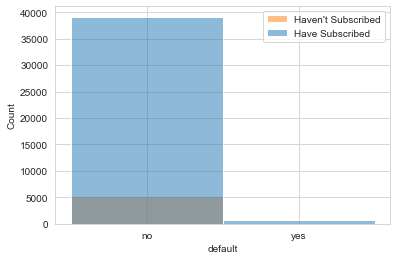

In [40]:
no2  = int(5237/44396*100)
yes2 = int(52/815*100)

print(f"Default | Yes: {yes2}%, No: {no2}%")
sns.histplot(data=df, x="default", hue="y")
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.show()

> Based on the graph above, it can be seen that clients who do not have credit have 5237 clients with a percentage of 11% than clients who have credit. Where clients who have credit are 52 clients with a percentage of 6%.

### **SUMMARY**
> Based on bank-full data, it can be seen that:

> 1. We know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%. Then it can be said that credit marketing has not been completely successful because when compared to customers who subscribe and do not subscribe, the comparison is so far. This is because there are still many clients who have not been contacted, so it can be assumed that there are still many clients who have not subscribed to deposits because they do not know the information related to this.
> 2. It can be assumed that the higher the education, the greater the tendency of a person to subscribed a term deposit.
> 3. The months of October, December, March and September are better opportunities because the distance between clients who choose to make deposits and those who don't, is not too far.